# VSE CA1 Part1

### Team
Kenneth Goh Chia Wei : A0198544N  
Tan Heng Han : A0198502B  
Raymond Ng Boon Cheong : A0198543R

In [1]:
import urllib.request
import shutil
import imgaug as ia
import os
from YOLO_API import *

D:\Anaconda\envs\rtav\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\rtav\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\rtav\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\rtav\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
# Download YOLOV3 Pretrained Weights
# This is a shortcut to download the pretrained weights, please ensure that the pretrained weights are fully downloaded before executing further cells
# If download code does not work, please cut and paste URL link below and paste into a browser address field to begin download
url = 'https://drive.google.com/file/d/1Y0E928LRsa1qmP_5P8jHfzSbI8A9T2Pb/view?usp=sharing'
with urllib.request.urlopen(url) as response, open('Yolov3_pretrained_weights.h5', 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

In [2]:
# Dataset directory
img_dir = "../data/image/"
anno_dir = "../data/annotation/"

In [3]:
# Construct YOLOv3 API object
yoloAPI = YoloV3_API(
    img_dir=img_dir,
    annotation_dir=anno_dir,
    saved_model_name='yolo_model.h5',
    train_size=0.8,
    height=416,
    width=416,
    threshold=0.3,
    batch_size=2)

Image directory: ../data/image/
Annotation directory: ../data/annotation/
Saved model name: yolo_model.h5
Train/validation size ratio: 0.8
Training size: 416x416
Threshold: 0.3
Batch Size: 2

All Image and annotation size: 765
Unique labels: dict_keys(['car', 'bus'])
Generated Anchor Boxes: [8, 10, 14, 18, 24, 26, 36, 45, 40, 29, 48, 82, 66, 44, 84, 75, 90, 120]

Training image and annotation size: 612
Validation image and annotation size: 153
Maximum bounding boxes in all images: 15

Train Generator created: To access, use <YoloV3_API.train_generator>
Validation Generator created: To access, use <YoloV3_API.valid_generator>







Instructions for updating:
Use `tf.cast` instead.

Loading pretrained weights
YOLOv3 Training Model created: To access, use <YoloV3_API.train_model>

YOLOv3 Inference Model created: To access, use <YoloV3_API.infer_model>

Train Model Summary
__________________________________________________________________________________________________
Layer (type)      

In [5]:
%%time
history = yoloAPI.fit_generator(epoch=300, lr=1e-4)


Epoch 1/300
306/306 [==============================] - 135s 443ms/step - loss: 42.4651 - yolo_loss_layer_4_loss: 6.6008 - yolo_loss_layer_5_loss: 11.9095 - yolo_loss_layer_6_loss: 21.6220 - val_loss: 67.7121 - val_yolo_loss_layer_4_loss: 14.8130 - val_yolo_loss_layer_5_loss: 21.4168 - val_yolo_loss_layer_6_loss: 29.1478

Epoch 00001: loss improved from inf to 42.46509, saving model to yolo_model.h5
Epoch 2/300
306/306 [==============================] - 99s 323ms/step - loss: 22.6403 - yolo_loss_layer_4_loss: 2.5204 - yolo_loss_layer_5_loss: 6.8813 - yolo_loss_layer_6_loss: 10.9056 - val_loss: 22.4141 - val_yolo_loss_layer_4_loss: 4.1543 - val_yolo_loss_layer_5_loss: 6.8329 - val_yolo_loss_layer_6_loss: 9.0956

Epoch 00002: loss improved from 42.46509 to 22.64027, saving model to yolo_model.h5
Epoch 3/300
306/306 [==============================] - 98s 321ms/step - loss: 20.0463 - yolo_loss_layer_4_loss: 2.6845 - yolo_loss_layer_5_loss: 6.4445 - yolo_loss_layer_6_loss: 8.5886 - val_loss

In [7]:
# Get all test images
imgpath = '../data/test_image/'
test_images = os.listdir(imgpath)

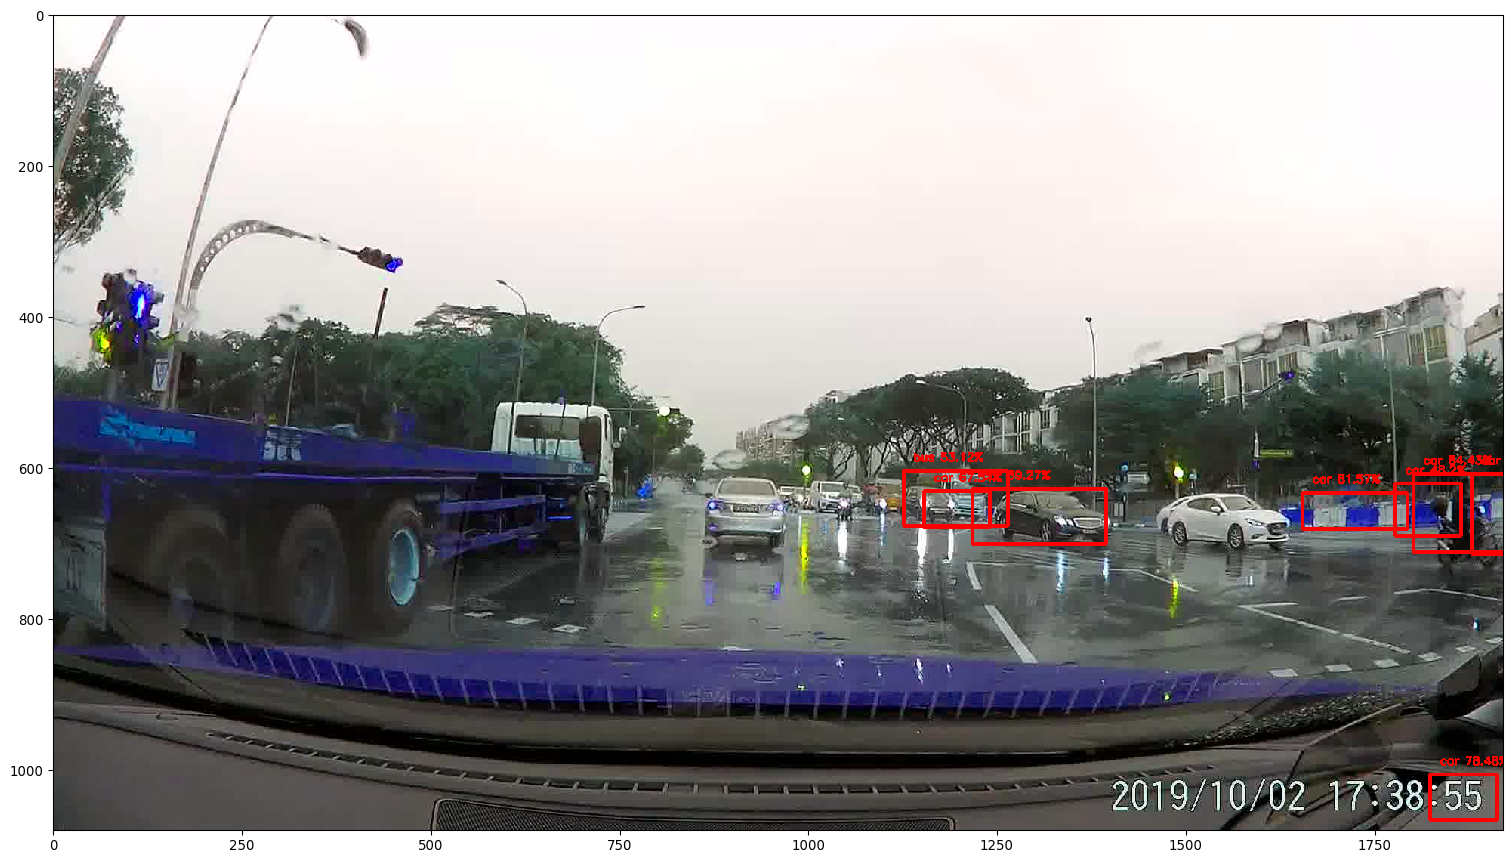

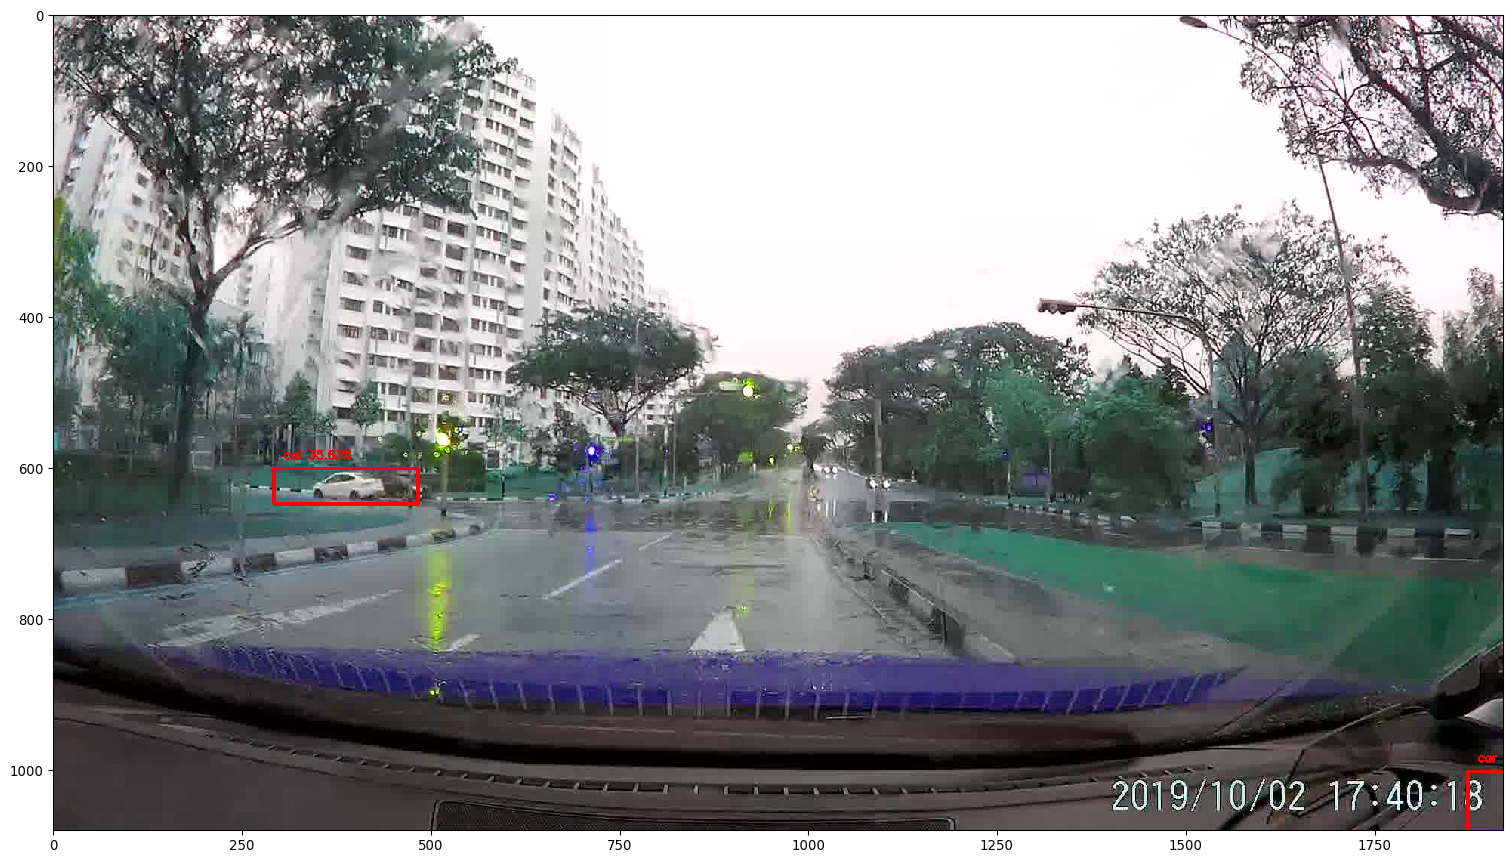

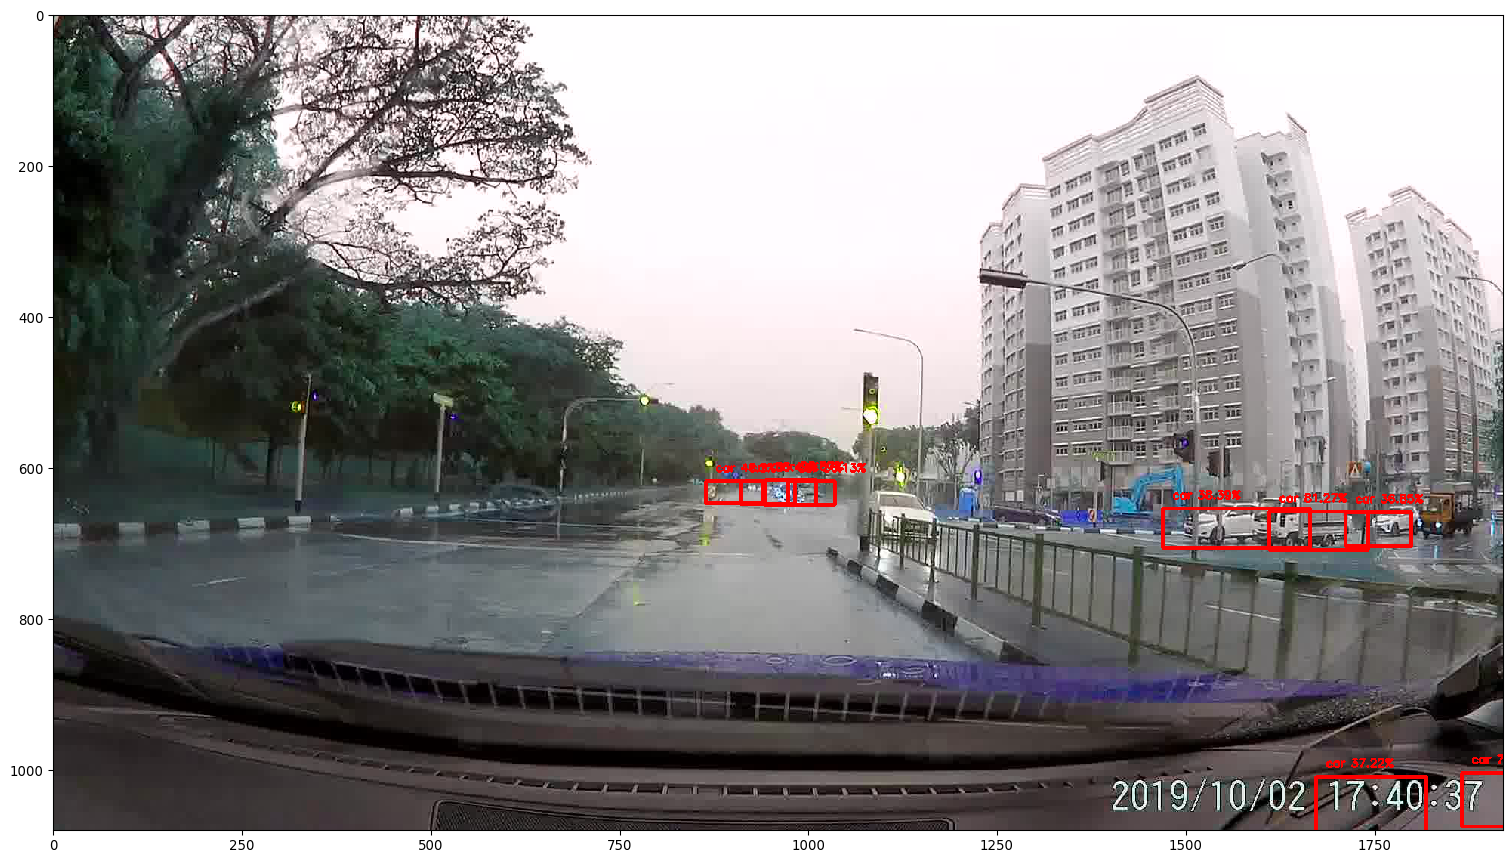

In [8]:
for img in test_images:
    img, pred = yoloAPI.predict(os.path.join(imgpath, img))
    img = yoloAPI.draw_prediction(img, pred)
    ia.imshow(img)